In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

# 全測試

In [3]:
all_data = pd.read_csv("C:/Users/ed307/Desktop/school/大三下/財經數據分析方法/實戰B_第七組/op.csv")
all_data.shape

(10584, 18)

In [4]:
all_data.isnull().sum()

sid               0
yyyy              0
risk_premium      0
Lag_shr           0
Lag_she           0
Lag_mshe          0
Lag_Tobins_Q      0
Lag_Tobins_Q_A    0
Lag_debtr         0
Lag_dy            0
Lag_netg          0
Lag_PE            0
Lag_par           0
Lag_sale          0
Lag_return        0
Lag_turn          0
Lag_idiorisk      0
Lag_riskprem      0
dtype: int64

In [5]:
all_data[all_data["risk_premium"].isnull()]

,sid,yyyy,risk_premium,Lag_shr,Lag_she,Lag_mshe,Lag_Tobins_Q,Lag_Tobins_Q_A,Lag_debtr,Lag_dy,Lag_netg,Lag_PE,Lag_par,Lag_sale,Lag_return,Lag_turn,Lag_idiorisk,Lag_riskprem


In [6]:
all_data.head(5)

,sid,yyyy,risk_premium,Lag_shr,Lag_she,Lag_mshe,Lag_Tobins_Q,Lag_Tobins_Q_A,Lag_debtr,Lag_dy,Lag_netg,Lag_PE,Lag_par,Lag_sale,Lag_return,Lag_turn,Lag_idiorisk,Lag_riskprem
0,TW_3090,2004,-0.177336,0.3232,0.0000,0.0666,0.99,0.99,0.6098,0.0722,0.3185,21.47,676,97,0.025929,0.139224,0.089012,0.011929
1,TW_4104,2004,-0.367772,0.4290,0.0000,0.0085,1.02,1.02,0.2852,0.0833,-0.1299,9.11,2617,2600,-0.131299,0.907680,0.062351,-0.145299
2,TW_4106,2004,-0.355042,0.4095,0.0000,0.0466,1.41,1.41,0.3556,0.0865,0.2461,10.40,1433,566,-0.024856,0.362419,0.065373,-0.038856
3,TW_4306,2004,-0.247998,0.3274,0.0000,0.0349,1.22,1.22,0.3966,0.0720,0.1142,10.04,1804,3289,0.138342,1.817253,0.104051,0.124342
4,TW_4414,2004,-0.353300,0.2041,0.5593,0.0017,1.01,1.01,0.5920,0.0635,0.1234,21.24,1694,3287,0.609740,2.519411,0.095785,0.595740


In [7]:
train = all_data[all_data["yyyy"]<=2019]

In [8]:
train.shape

(9151, 18)

In [9]:
train.columns

Index(['sid', 'yyyy', 'risk_premium', 'Lag_shr', 'Lag_she', 'Lag_mshe',
       'Lag_Tobins_Q', 'Lag_Tobins_Q_A', 'Lag_debtr', 'Lag_dy', 'Lag_netg',
       'Lag_PE', 'Lag_par', 'Lag_sale', 'Lag_return', 'Lag_turn',
       'Lag_idiorisk', 'Lag_riskprem'],
      dtype='object')

In [10]:
test_2020 = all_data[all_data["yyyy"]==2020]
test_2020.shape

(769, 18)

In [11]:
test_2021 = all_data[all_data["yyyy"]==2021]
test_2021.shape

(664, 18)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, BayesianRidge, LogisticRegression
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.model_selection import train_test_split
from itertools import combinations
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, classification_report, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_error

In [13]:
def liner(start,k,col,train,test_set):
    X_train, y_train = train[col], train['risk_premium']
    X_test, y_test = test_set[col], test_set['risk_premium']
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
    if k:
        return {"star_yyyy":start,"YEAR":2020,"COL":col, "MAE":'{:.6f}'.format(mae), "RMSE":'{:.6f}'.format(rmse)}
    return {"star_yyyy":start,"YEAR":2021,"COL":col, "MAE":'{:.6f}'.format(mae), "RMSE":'{:.6f}'.format(rmse)}

In [14]:
train.columns
tests = [test_2020,test_2021]
col_list = ['Lag_shr', 'Lag_she', 'Lag_mshe',
       'Lag_Tobins_Q', 'Lag_Tobins_Q_A', 'Lag_debtr', 'Lag_dy', 'Lag_netg',
       'Lag_PE', 'Lag_par', 'Lag_sale', 'Lag_return', 'Lag_turn',
       'Lag_idiorisk', 'Lag_riskprem']

In [15]:
s="B0"
for i in range(len(col_list)):
    s += "+B"+str(i+1)+"*"+col_list[i]
print(s)

B0+B1*Lag_shr+B2*Lag_she+B3*Lag_mshe+B4*Lag_Tobins_Q+B5*Lag_Tobins_Q_A+B6*Lag_debtr+B7*Lag_dy+B8*Lag_netg+B9*Lag_PE+B10*Lag_par+B11*Lag_sale+B12*Lag_return+B13*Lag_turn+B14*Lag_idiorisk+B15*Lag_riskprem


In [16]:
import time

In [17]:
for i in range(2003,2018,1):
    print(i)

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [18]:
start = time.time()
result = []
for start in range(2004,2019,1):
    train = train[train["yyyy"]!=start]
    for i in range(len(col_list)):
        n_comb = list(combinations(col_list, i+1))
        for l in n_comb:
            _in = list(l)
            for k in range(2):
                result.append(liner(start,k,_in,train,tests[k]))
    print(result[-1])    
end = time.time()
print(format(end-start))

{'star_yyyy': 2004, 'YEAR': 2020, 'COL': ['Lag_shr', 'Lag_she', 'Lag_mshe', 'Lag_Tobins_Q', 'Lag_Tobins_Q_A', 'Lag_debtr', 'Lag_dy', 'Lag_netg', 'Lag_PE', 'Lag_par', 'Lag_sale', 'Lag_return', 'Lag_turn', 'Lag_idiorisk', 'Lag_riskprem'], 'MAE': '0.271442', 'RMSE': '0.373940'}
{'star_yyyy': 2005, 'YEAR': 2020, 'COL': ['Lag_shr', 'Lag_she', 'Lag_mshe', 'Lag_Tobins_Q', 'Lag_Tobins_Q_A', 'Lag_debtr', 'Lag_dy', 'Lag_netg', 'Lag_PE', 'Lag_par', 'Lag_sale', 'Lag_return', 'Lag_turn', 'Lag_idiorisk', 'Lag_riskprem'], 'MAE': '0.270953', 'RMSE': '0.373584'}
{'star_yyyy': 2006, 'YEAR': 2020, 'COL': ['Lag_shr', 'Lag_she', 'Lag_mshe', 'Lag_Tobins_Q', 'Lag_Tobins_Q_A', 'Lag_debtr', 'Lag_dy', 'Lag_netg', 'Lag_PE', 'Lag_par', 'Lag_sale', 'Lag_return', 'Lag_turn', 'Lag_idiorisk', 'Lag_riskprem'], 'MAE': '0.273646', 'RMSE': '0.370650'}
{'star_yyyy': 2007, 'YEAR': 2020, 'COL': ['Lag_shr', 'Lag_she', 'Lag_mshe', 'Lag_Tobins_Q', 'Lag_Tobins_Q_A', 'Lag_debtr', 'Lag_dy', 'Lag_netg', 'Lag_PE', 'Lag_par', 'Lag_s

In [83]:
Result.shape

(983010, 6)

In [19]:
Result = pd.DataFrame(result)
Result.to_csv("Result_2.csv")

In [20]:
Result = pd.read_csv("Result_2.csv")

In [21]:
Result.head(10)

,Unnamed: 0,star_yyyy,YEAR,COL,MAE,RMSE
0,0,2004,2021,['Lag_shr'],0.244951,0.351019
1,1,2004,2020,['Lag_shr'],0.239678,0.335815
2,2,2004,2021,['Lag_she'],0.245144,0.351193
3,3,2004,2020,['Lag_she'],0.239695,0.335788
4,4,2004,2021,['Lag_mshe'],0.244855,0.350937
5,5,2004,2020,['Lag_mshe'],0.239521,0.335701
6,6,2004,2021,['Lag_Tobins_Q'],0.248147,0.368114
7,7,2004,2020,['Lag_Tobins_Q'],0.249211,0.358149
8,8,2004,2021,['Lag_Tobins_Q_A'],0.248224,0.368244
9,9,2004,2020,['Lag_Tobins_Q_A'],0.249193,0.358100


In [22]:
Result.shape

(983010, 6)

In [23]:
Result=Result[Result["MAE"]<1]
Result=Result[Result["RMSE"]<1]
Result.shape

(982870, 6)

In [54]:
Result = pd.read_csv("Result_2.csv")
Result_1=Result[Result["MAE"]<0.2397]
Result_1=Result_1[Result["RMSE"]<0.3357]
Result_1.shape

C:\Users\ed307\AppData\Local\Temp/ipykernel_28700/561670079.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Result_1=Result_1[Result["RMSE"]<0.3357]


(6, 6)

In [70]:
Result_1

,Unnamed: 0,star_yyyy,YEAR,COL,MAE,RMSE
59,59,2004,2020,"['Lag_she', 'Lag_mshe']",0.239557,0.335671
105,105,2004,2020,"['Lag_mshe', 'Lag_idiorisk']",0.239609,0.335586
287,287,2004,2020,"['Lag_shr', 'Lag_mshe', 'Lag_idiorisk']",0.239614,0.335588
443,443,2004,2020,"['Lag_she', 'Lag_mshe', 'Lag_idiorisk']",0.239646,0.335559
665,665,2004,2020,"['Lag_mshe', 'Lag_netg', 'Lag_idiorisk']",0.239676,0.335651
1393,1393,2004,2020,"['Lag_shr', 'Lag_mshe', 'Lag_netg', 'Lag_idior...",0.239676,0.335650


In [81]:
Result = pd.read_csv("Result_2.csv")
Result_1=Result[Result["MAE"]>1]
Result_1=Result_1[Result["RMSE"]>1]
Result_1.shape

C:\Users\ed307\AppData\Local\Temp/ipykernel_28700/1089787944.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Result_1=Result_1[Result["RMSE"]>1]


(140, 6)

In [82]:
Result_1.head(10)

,Unnamed: 0,star_yyyy,YEAR,COL,MAE,RMSE
786641,786641,2016,2020,"['Lag_return', 'Lag_riskprem']",8.510155e+09,8.510155e+09
786979,786979,2016,2020,"['Lag_she', 'Lag_return', 'Lag_riskprem']",1.228722e+10,1.228722e+10
787383,787383,2016,2020,"['Lag_debtr', 'Lag_return', 'Lag_riskprem']",5.835006e+07,5.835006e+07
787555,787555,2016,2020,"['Lag_return', 'Lag_idiorisk', 'Lag_riskprem']",1.577395e+10,1.577395e+10
788111,788111,2016,2020,"['Lag_shr', 'Lag_debtr', 'Lag_return', 'Lag_ri...",1.088119e+11,1.088119e+11
788167,788167,2016,2020,"['Lag_shr', 'Lag_dy', 'Lag_return', 'Lag_riskp...",7.527319e+10,7.527319e+10
788283,788283,2016,2020,"['Lag_shr', 'Lag_return', 'Lag_idiorisk', 'Lag...",1.522885e+10,1.522885e+10
789865,789865,2016,2020,"['Lag_Tobins_Q_A', 'Lag_return', 'Lag_idiorisk...",8.652643e+09,8.652643e+09
789917,789917,2016,2020,"['Lag_debtr', 'Lag_dy', 'Lag_return', 'Lag_ris...",9.573105e+10,9.573105e+10
790033,790033,2016,2020,"['Lag_debtr', 'Lag_return', 'Lag_idiorisk', 'L...",3.632438e+09,3.632438e+09


In [59]:
Result.iloc[[1393,1392]]

,Unnamed: 0,star_yyyy,YEAR,COL,MAE,RMSE
1393,1393,2004,2020,"['Lag_shr', 'Lag_mshe', 'Lag_netg', 'Lag_idior...",0.239676,0.335650
1392,1392,2004,2021,"['Lag_shr', 'Lag_mshe', 'Lag_netg', 'Lag_idior...",0.245178,0.351773


In [60]:
Result.iloc[1393]["COL"]

"['Lag_shr', 'Lag_mshe', 'Lag_netg', 'Lag_idiorisk']"

In [225]:
ind = []
for i in Result_1.index:
    ind.append(i+1)
Result.iloc[ind]

,Unnamed: 0,star_yyyy,YEAR,COL,MAE,RMSE
262140,262140,2008,2021,['Lag_mshe'],0.302576,0.504032
262142,262142,2008,2021,['Lag_Tobins_Q'],0.302714,0.508673
262152,262152,2008,2021,['Lag_PE'],0.303671,0.505320
262170,262170,2008,2021,"['Lag_shr', 'Lag_Tobins_Q']",0.303298,0.508595
262196,262196,2008,2021,"['Lag_she', 'Lag_Tobins_Q']",0.302672,0.508775
262206,262206,2008,2021,"['Lag_she', 'Lag_PE']",0.303540,0.505797
262230,262230,2008,2021,"['Lag_mshe', 'Lag_PE']",0.303539,0.505112
262378,262378,2008,2021,"['Lag_shr', 'Lag_she', 'Lag_Tobins_Q']",0.303245,0.508743
262412,262412,2008,2021,"['Lag_shr', 'Lag_mshe', 'Lag_PE']",0.303650,0.505074
262568,262568,2008,2021,"['Lag_she', 'Lag_mshe', 'Lag_PE']",0.303485,0.505607


In [226]:
result_2021=Result[Result["YEAR"]==2021]

In [228]:
min(result_2021["MAE"])

0.294337

In [233]:
Result[Result["MAE"]==min(result_2021["MAE"])]

,Unnamed: 0,star_yyyy,YEAR,COL,MAE,RMSE
138647,138647,2006,2020,"['Lag_mshe', 'Lag_Tobins_Q', 'Lag_PE', 'Lag_pa...",0.294337,0.471433
145225,145225,2006,2020,"['Lag_she', 'Lag_mshe', 'Lag_Tobins_Q', 'Lag_P...",0.294337,0.471485
198329,198329,2007,2020,"['Lag_shr', 'Lag_dy', 'Lag_PE', 'Lag_sale']",0.294337,0.473170
728415,728415,2015,2020,"['Lag_mshe', 'Lag_Tobins_Q', 'Lag_netg', 'Lag_...",0.294337,0.474457
728649,728649,2015,2020,"['Lag_mshe', 'Lag_Tobins_Q_A', 'Lag_netg', 'La...",0.294337,0.474340
733657,733657,2015,2020,"['Lag_shr', 'Lag_Tobins_Q', 'Lag_dy', 'Lag_PE'...",0.294337,0.472535
806764,806764,2016,2021,"['Lag_shr', 'Lag_she', 'Lag_mshe', 'Lag_Tobins...",0.294337,0.511782


In [235]:
Result.iloc[[806763,806764]]

,Unnamed: 0,star_yyyy,YEAR,COL,MAE,RMSE
806763,806763,2016,2020,"['Lag_shr', 'Lag_she', 'Lag_mshe', 'Lag_Tobins...",0.283082,0.456039
806764,806764,2016,2021,"['Lag_shr', 'Lag_she', 'Lag_mshe', 'Lag_Tobins...",0.294337,0.511782


In [236]:
Result[Result["RMSE"]==min(result_2021["RMSE"])]

,Unnamed: 0,star_yyyy,YEAR,COL,MAE,RMSE
106269,106269,2005,2020,"['Lag_she', 'Lag_mshe', 'Lag_Tobins_Q_A', 'Lag...",0.318860,0.499949
203365,203365,2007,2020,"['Lag_she', 'Lag_Tobins_Q_A', 'Lag_dy', 'Lag_s...",0.310497,0.499949
205757,205757,2007,2020,"['Lag_Tobins_Q_A', 'Lag_dy', 'Lag_netg', 'Lag_...",0.310665,0.499949
923846,923846,2018,2021,"['Lag_she', 'Lag_Tobins_Q', 'Lag_Tobins_Q_A', ...",0.313063,0.499949


In [237]:
Result.iloc[[923845,923846]]

,Unnamed: 0,star_yyyy,YEAR,COL,MAE,RMSE
923845,923845,2018,2020,"['Lag_she', 'Lag_Tobins_Q', 'Lag_Tobins_Q_A', ...",0.298965,0.442717
923846,923846,2018,2021,"['Lag_she', 'Lag_Tobins_Q', 'Lag_Tobins_Q_A', ...",0.313063,0.499949


In [27]:
min(Result["MAE"])

0.239499

In [28]:
min(Result["MAE"])

0.239499

In [64]:
max(Result["MAE"])

363254898191.87506

In [69]:
Result[Result["MAE"]==max(Result["MAE"])]

,Unnamed: 0,star_yyyy,YEAR,COL,MAE,RMSE
919235,919235,2018,2020,"['Lag_shr', 'Lag_dy', 'Lag_return', 'Lag_riskp...",3.632549e+11,3.632549e+11


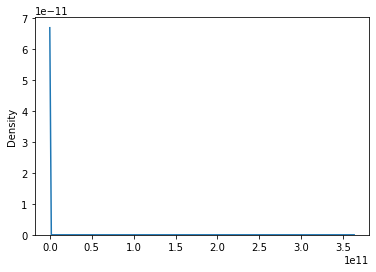

In [61]:
sns.kdeplot(np.float_(list(Result["MAE"])))
plt.show()

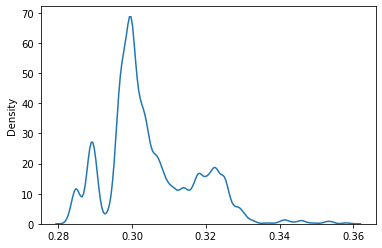

In [184]:
sns.kdeplot(np.float_(list(Result["MAE"])))
plt.show()

In [161]:
list(Result[Result["MAE"]==min(Result["MAE"])]["COL"])

[['Lag_shr', 'Lag_mshe', 'Lag_netg', 'Lag_idiorisk']]

In [30]:
min(Result["RMSE"])

0.321728

In [162]:
min(Result["RMSE"])

'0.438203'

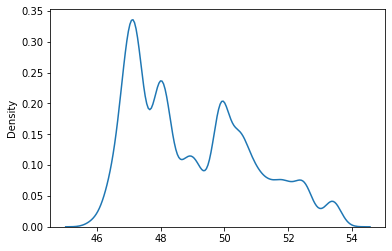

In [51]:
sns.kdeplot(np.float_(list(Result["RMSE"])))
plt.show()

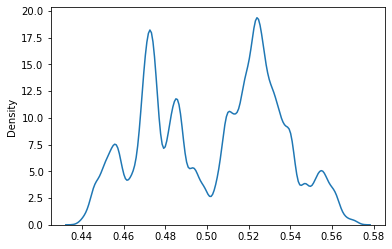

In [185]:
sns.kdeplot(np.float_(list(Result["RMSE"])))
plt.show()

In [31]:
list(Result[Result["RMSE"]==min(Result["RMSE"])]["COL"])

["['Lag_shr', 'Lag_Tobins_Q_A']"]

In [164]:
list(Result[Result["RMSE"]==min(Result["RMSE"])]["COL"])

[['Lag_PE']]

In [165]:
list(Result[Result["MAE"]==min(Result["MAE"])]["COL"])

[['Lag_shr', 'Lag_mshe', 'Lag_netg', 'Lag_idiorisk']]

In [37]:
list(Result[Result["MAE"]==min(Result["MAE"])]["COL"])

["['Lag_shr', 'Lag_mshe']"]

In [38]:
list(Result[Result["MAE"]==max(Result["MAE"])]["COL"])

["['Lag_shr', 'Lag_dy', 'Lag_return', 'Lag_riskprem']"]

In [35]:
list(Result[Result["RMSE"]==min(Result["RMSE"])]["COL"])

["['Lag_shr', 'Lag_Tobins_Q_A']"]

In [36]:
list(Result[Result["RMSE"]==max(Result["RMSE"])]["COL"])

["['Lag_shr', 'Lag_dy', 'Lag_return', 'Lag_riskprem']"]

In [39]:
Result[Result["RMSE"]==min(Result["RMSE"])]

,Unnamed: 0,star_yyyy,YEAR,COL,MAE,RMSE
917513,917513,2018,2020,"['Lag_shr', 'Lag_Tobins_Q_A']",0.246311,0.321728


In [40]:
Result[Result["RMSE"]==min(Result["RMSE"])]

,Unnamed: 0,star_yyyy,YEAR,COL,MAE,RMSE
917513,917513,2018,2020,"['Lag_shr', 'Lag_Tobins_Q_A']",0.246311,0.321728


In [41]:
Result[Result["MAE"]==min(Result["MAE"])]

,Unnamed: 0,star_yyyy,YEAR,COL,MAE,RMSE
65567,65567,2005,2020,"['Lag_shr', 'Lag_mshe']",0.239499,0.336142


In [252]:
Result.iloc[[917492,917493]]

,Unnamed: 0,star_yyyy,YEAR,COL,MAE,RMSE
917492,917492,2018,2021,['Lag_PE'],0.313144,0.500613
917493,917493,2018,2020,['Lag_PE'],0.296549,0.438203


In [250]:
Result.iloc[[917493,917494]]

,Unnamed: 0,star_yyyy,YEAR,COL,MAE,RMSE
917493,917493,2018,2020,['Lag_PE'],0.296549,0.438203
917494,917494,2018,2021,['Lag_par'],0.312965,0.500663


In [247]:
Result.iloc[[20962,20963]]

,Unnamed: 0,star_yyyy,YEAR,COL,MAE,RMSE
20962,20962,2004,2021,"['Lag_shr', 'Lag_she', 'Lag_Tobins_Q', 'Lag_To...",0.319706,0.541917
20963,20963,2004,2020,"['Lag_shr', 'Lag_she', 'Lag_Tobins_Q', 'Lag_To...",0.298264,0.480810


In [66]:
s="B0"
# ["Lag_shr", "Lag_mshe", "Lag_netg", "Lag_idiorisk"]
a = ['Lag_shr', 'Lag_dy', 'Lag_return', 'Lag_riskprem']
for i in range(len(a)):
    s += "+B"+str(i+1)+"*"+a[i]
print(s)

B0+B1*Lag_shr+B2*Lag_dy+B3*Lag_return+B4*Lag_riskprem


In [67]:
s = ""
for i in a:
    s+=i+" "
print(s)

Lag_shr Lag_dy Lag_return Lag_riskprem 


In [85]:
import math
def it(n):
    sum_ = 0
    for m in range(1,n+1,1):
        sum_ += (math.factorial(n)//(math.factorial(m)*math.factorial(n-m)))
    return sum_

_30 = it(20)
_15 = it(15)
_10 = it(10)
print(_30)
print(_15)
print(_10)
print(_30/_10)

1048575
32767
1023
1025.0


In [10]:
10250/60/60

2.8472222222222223

In [78]:

a.head(5)

,證券代碼,年月,TEJ產業_代碼,股利殖利率-TSE,本益比-TSE,TEJ產業_名稱,市值(百萬元),成交值(百萬元)_年,報酬率％_年,週轉率％_年
0,1101 台泥,2021-12-30,M11A,7.02,14.08,水泥製造,294011.0,282962.0,18.9741,94.4961
1,1102 亞泥,2021-12-30,M11A,7.81,10.16,水泥製造,157069.0,119618.0,10.2078,71.4324
2,1103 嘉泥,2021-12-30,M11A,6.75,7.31,水泥製造,16077.0,10367.0,16.4133,59.4099
3,1104 環泥,2021-12-30,M11A,5.09,12.78,水泥製造,14118.0,7759.0,-2.0660,49.0927
4,1108 幸福,2021-12-30,M11A,5.88,20.52,水泥製造,4816.0,7897.0,-0.8563,129.9253


In [91]:
def sp_0(_in):
    out = _in.split(" ")
    return str(out[0])
def sp_1(_in):
    out = _in.split(" ")
    return out[1]
def pros(file_name):
    path = "C:/Users/ed307/Desktop/sas_B/"+file_name+".xlsx"
    a = pd.read_excel(path)
    a.insert(1, "簡稱", a["證券代碼"].apply(sp_1))
    a["證券代碼"] = a["證券代碼"].apply(sp_0)
    a.to_excel(file_name+"_n.xlsx")
    print("Done")

In [92]:
pros("股價資料")

Done


In [93]:
pros("會計資料")

Done


In [94]:
pros("董監持股")

Done


In [113]:
from math import factorial

def find_H(_up, _find):
    a = []
    for i in range(1,_up,1):
        for l in range(1,_up,1):
            if(factorial(i+l-1)/(factorial(i)*factorial(l-1)) == _find):
                a.append({"i":i,"l":l})
    if len(a):
        return a
    return "NOT FIND"

In [114]:
find_H(30,163011640)

[{'i': 29, 'l': 10}]

In [115]:
find_H(100,163011640)

[{'i': 9, 'l': 30}, {'i': 29, 'l': 10}]

In [116]:
find_H(500,163011640)

[{'i': 9, 'l': 30}, {'i': 29, 'l': 10}]

In [117]:
find_H(500,118360)

'NOT FIND'